# Understanding of Cross Entropy

## 1. Basic usage of the CE loss

In [62]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [104]:
def cross_ent_loss(x,y):
  return (y * (-torch.log(x)))

In [105]:
# if we have two different prob distributions below:
a = torch.FloatTensor([[0.1, 0.2, 0.7]])
b = torch.FloatTensor([[0, 0, 1]])
cross_ent_loss(a,b)

tensor([[0.0000, 0.0000, 0.3567]])

In [93]:
# Even two distributions are almost identical, it returns marginal loss values
a = torch.FloatTensor([[0, 0, 0, 0, 0.01, 0.99]])
b = torch.FloatTensor([[0, 0, 0, 0, 0, 1]])
cross_ent_loss(a,b)

tensor([[   nan,    nan,    nan,    nan, 0.0000, 0.0101]])

## 1-1. Cross Entropy using Pytorch

In [109]:
a = torch.FloatTensor([[0.1, 0.2, 0.7]])
b = torch.LongTensor([2])
torch.nn.functional.cross_entropy(a,b) 
## 값이 왜 다를까?? cross_entropy 함수에는 nn.softmax(x) 가 자동으로 포함되어있다!! 그러니 pytorch 에서 제공하는 cross_entropy함수 사용할시 softamx를 생략해야함

tensor(0.7679)

## 2. An example of real-word problem for CE (with ignoring sequencial information) 
 - 가위바위보 순서를 고려하지 않고 경태의 10번 실제 가위바위보 결과(real)를 토대로, 시스템이 예측한 모델1과 모델2 중 어떤 모델이 더 우수할까? (loss가 작아야할까?)

In [38]:
real = np.array(["가위", "가위", "바위", "바위", "바위", "바위", "바위", "보", "보","보"])
model1_pred = np.array(["가위", "바위", "바위", "바위", "보", "보", "보", "보", "보", "보"])
model2_pred = np.array(["가위", "바위", "보", "보", "보", "보", "보", "보", "보", "보"])
real_prob = torch.FloatTensor([0.2, 0.5, 0.3]) 
model1_prob = torch.FloatTensor([0.1, 0.3, 0.6])
model2_prob = torch.FloatTensor([0.1, 0.1, 0.8])

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


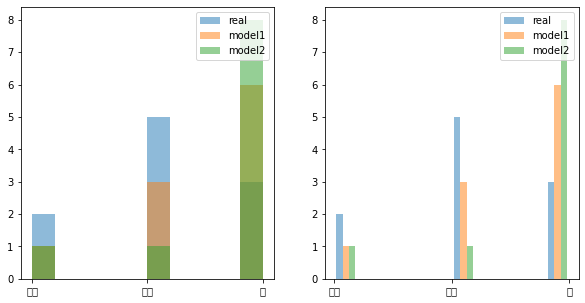

In [39]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax1.hist(real, alpha=0.5, label='real')
ax1.hist(model1_pred, alpha=0.5, label='model1')
ax1.hist(model2_pred, alpha=0.5, label='model2')
ax1.legend(loc='upper right')

ax2 = plt.subplot(122)
ax2.hist([real, model1_pred, model2_pred], alpha=0.5, label=['real','model1',"model2"])
ax2.legend(loc='upper right')
plt.show()

In [92]:
model1_loss = cross_ent_loss(real_prob,model1_prob)
model2_loss = cross_ent_loss(real_prob,model2_prob)
print(model1_loss.sum(), model2_loss.sum())

tensor(1.0913) tensor(1.1934)


## 3. 과제: 위의 2번 문제 중 순서를 고려한다 했을때 바로 이전 가위바위보의 순서만 고려할 경우 model1과 model2의 확률분포, 확률모형, 확률함수 CE loss 값을 구하시오